In [22]:
!pip install biopython
!pip install gdc-client
!pip install scanpy
!pip install lifelines
!pip install rpy2



ERROR: Could not find a version that satisfies the requirement gdc-client (from versions: none)
ERROR: No matching distribution found for gdc-client


In [23]:
import pandas as pd

data = pd.read_csv('RNA_seq_1.csv')
print(data.head())


  attrib_name  TCGA.02.0001  TCGA.02.0003  TCGA.02.0004  TCGA.02.0007  \
0        AACS        6.5006        6.5392        7.3778        7.1869   
1       FSTL1        8.7297        9.7944       12.0596        4.9451   
2       ELMO2        5.5114        6.2140        7.0517        5.2304   
3     CREB3L1        4.8830        4.8363        6.1124        5.8186   
4       RPS11       10.9848       10.8112       10.4364       10.4773   

   TCGA.02.0009  TCGA.02.0010  TCGA.02.0011  TCGA.02.0014  TCGA.02.0015  ...  \
0        7.6750        7.9960        8.3551        6.8401        6.3491  ...   
1       10.8401        8.9316        4.2406        7.7385       10.7565  ...   
2        6.6207        7.5524        6.7073        7.2623        7.1187  ...   
3        5.3332        6.0873        4.8655        4.5245        4.8251  ...   
4       10.6373       11.0015       10.6859       10.6613       10.2849  ...   

   TCGA.76.4932  TCGA.76.4934  TCGA.76.4935  TCGA.76.6191  TCGA.76.6192  \
0    

In [24]:
numeric_data = data.iloc[:, 1:]  # Exclude the first column


In [25]:
numeric_data = numeric_data.fillna(numeric_data.mean())


In [26]:
# Separate gene names
gene_names = data.iloc[:, 0]

# Process numeric data
numeric_data = numeric_data.fillna(numeric_data.mean())

# Reattach gene names
processed_data = pd.concat([gene_names, numeric_data], axis=1)

data = processed_data

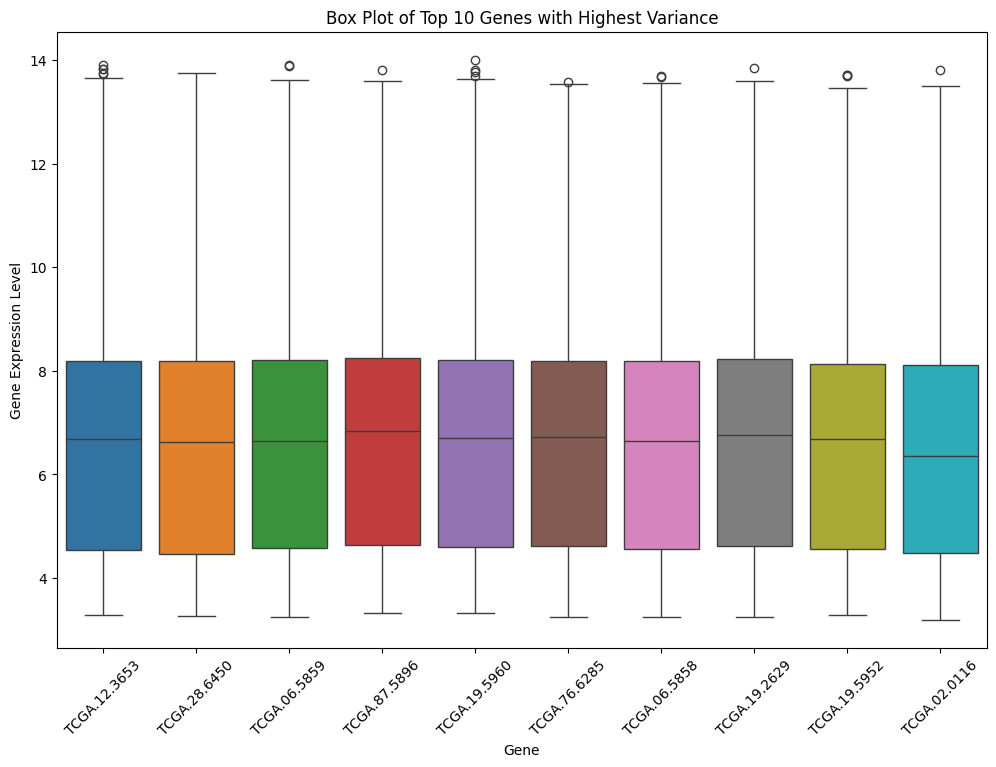

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=['number'])  # This will select only numeric columns

# Calculate the variance for each gene expression across the samples
variance = numeric_data.var()

# Sort the variance in descending order to get the top 10 genes with the highest variance
top_10_genes = variance.nlargest(10).index

# Select the data corresponding to these top 10 genes
top_10_data = numeric_data[top_10_genes]

# Create a box plot for the top 10 genes
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_10_data)

# Set plot labels and title
plt.title('Box Plot of Top 10 Genes with Highest Variance')
plt.xlabel('Gene')
plt.ylabel('Gene Expression Level')

# Show the plot
plt.xticks(rotation=45)  # Rotate the gene labels for better readability
plt.show()


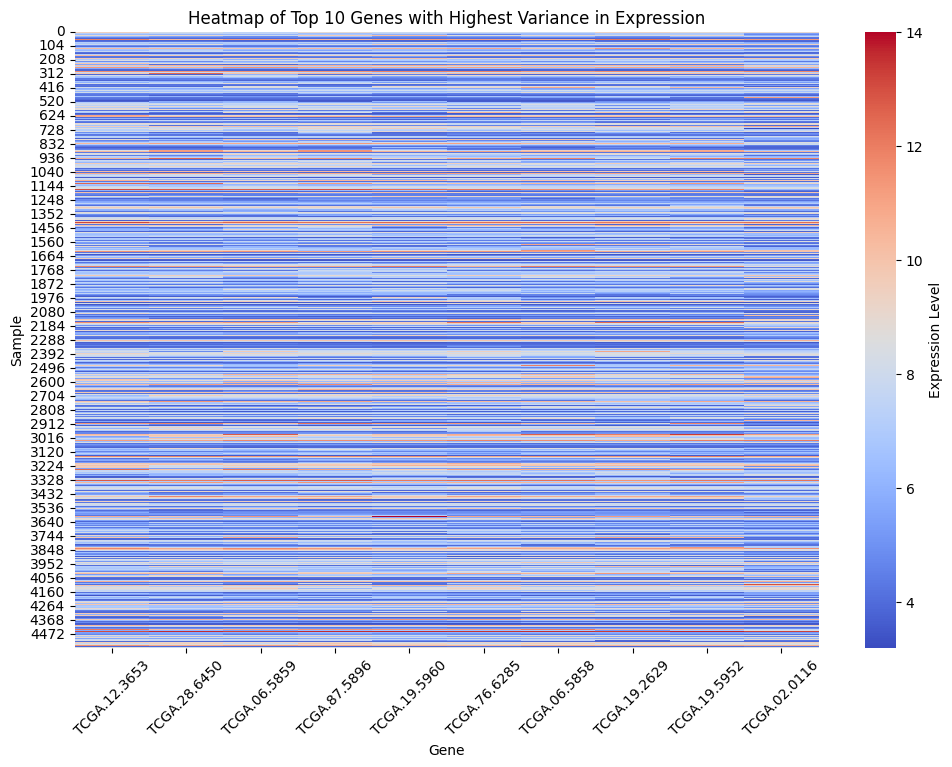

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['number'])

# Calculate the variance for each gene expression across the samples
variance = numeric_data.var()

# Sort the variance in descending order to get the top 10 genes with the highest variance
top_10_genes = variance.nlargest(10).index

# Select the data corresponding to these top 10 genes
top_10_data = numeric_data[top_10_genes]

# Create a heatmap for the top 10 genes
plt.figure(figsize=(12, 8))
sns.heatmap(top_10_data, cmap='coolwarm', annot=False, fmt='g', cbar_kws={'label': 'Expression Level'})

# Set plot labels and title
plt.title('Heatmap of Top 10 Genes with Highest Variance in Expression')
plt.xlabel('Gene')
plt.ylabel('Sample')

# Show the plot
plt.xticks(rotation=45)  # Rotate the gene labels for better readability
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data.iloc[:, 1:])  # Skip the first column (gene names)


In [30]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)  # Adjust threshold based on dataset characteristics
filtered_data = selector.fit_transform(normalized_data)


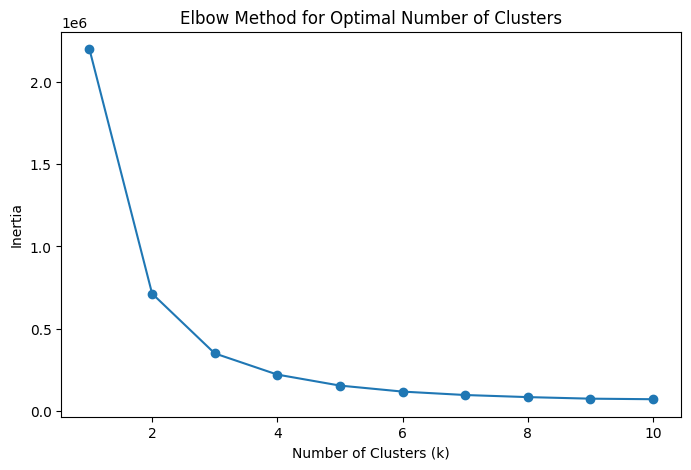

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Use two components for simplicity
principal_components = pca.fit_transform(normalized_data)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of cluster numbers to evaluate
cluster_range = range(1, 11)
inertias = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertias.append(kmeans.inertia_)  # Inertia measures within-cluster sum of squares

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [45]:
from sklearn.metrics import silhouette_score

score = silhouette_score(filtered_data, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.4487614670923467


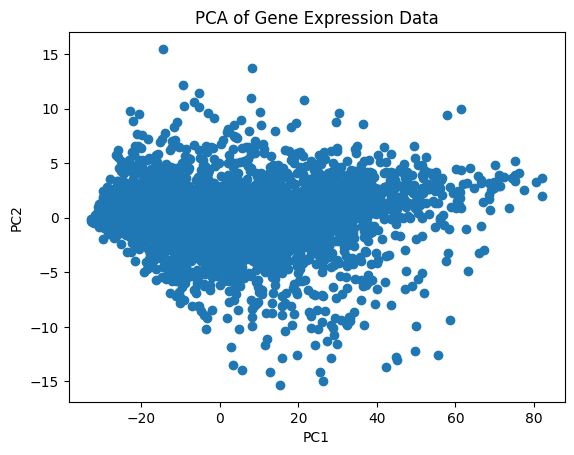

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_result = pca.fit_transform(filtered_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA of Gene Expression Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


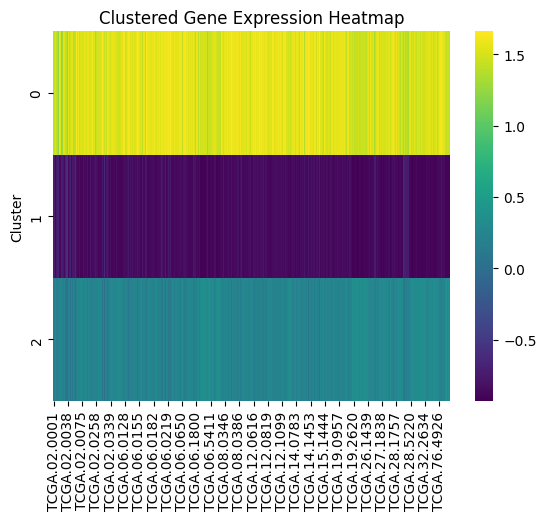

In [34]:
import seaborn as sns

clustered_data = pd.DataFrame(filtered_data, columns=data.columns[1:])
clustered_data['Cluster'] = labels
sns.heatmap(clustered_data.groupby('Cluster').mean(), cmap="viridis")
plt.title("Clustered Gene Expression Heatmap")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


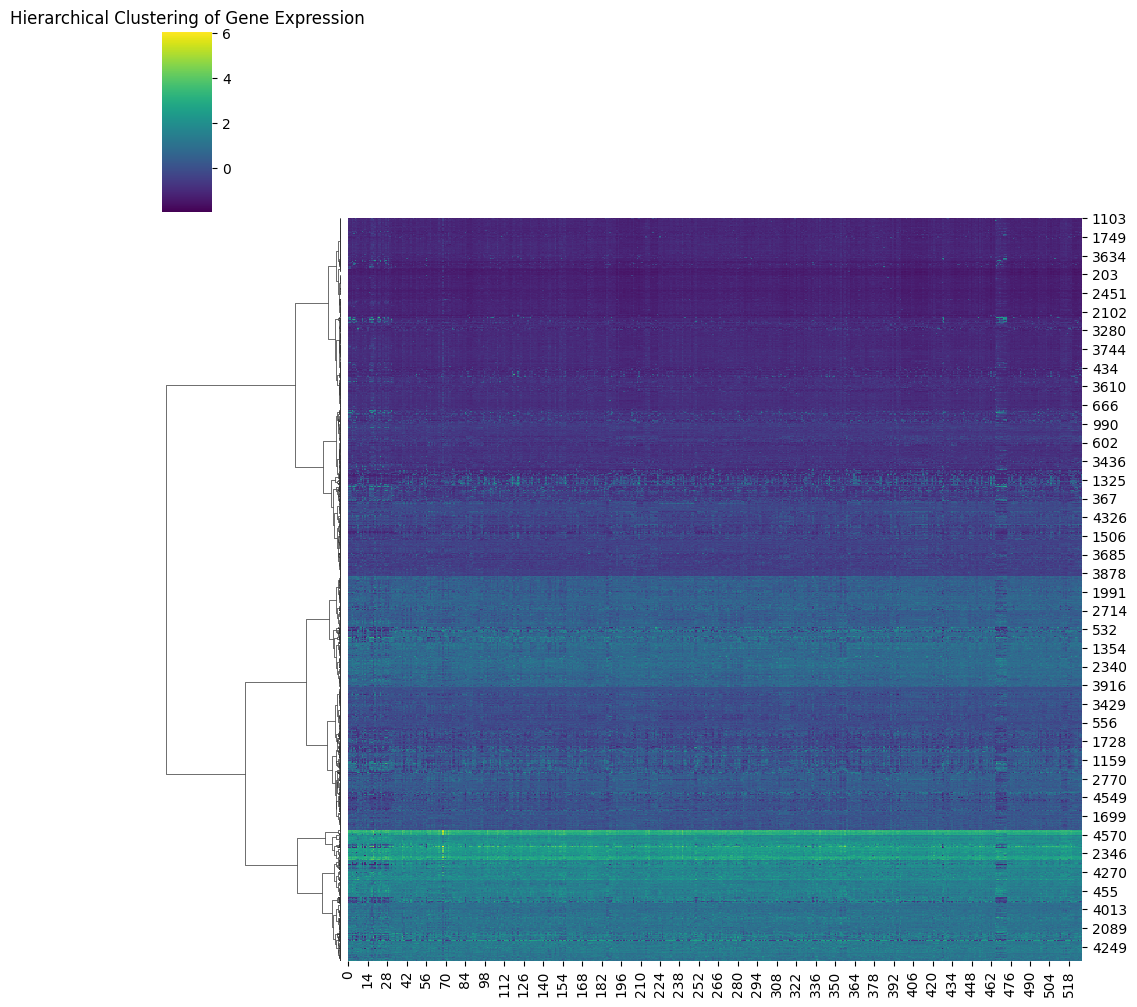

In [35]:
import seaborn as sns

sns.clustermap(filtered_data, cmap="viridis", method="ward", col_cluster=False)
plt.title("Hierarchical Clustering of Gene Expression")
plt.show()


In [36]:
import numpy as np

top_genes = np.argsort(-np.var(filtered_data, axis=0))[:10]
print("Top 10 genes contributing to variance:", data.columns[1:][top_genes])



Top 10 genes contributing to variance: Index(['TCGA.06.0650', 'TCGA.32.4210', 'TCGA.14.0867', 'TCGA.14.0871',
       'TCGA.32.2616', 'TCGA.27.2521', 'TCGA.14.1453', 'TCGA.06.0410',
       'TCGA.14.2555', 'TCGA.14.3476'],
      dtype='object')


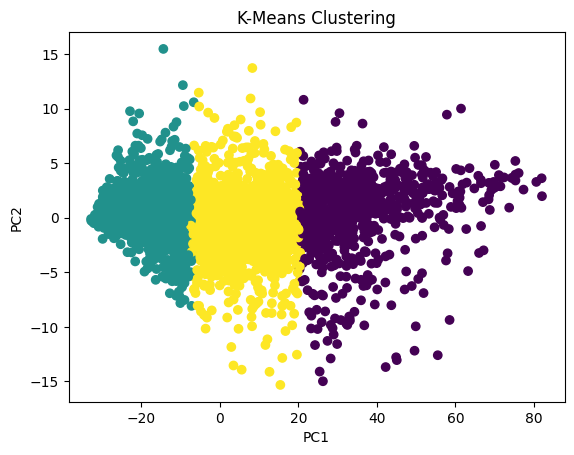

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)  # Experiment with different values of k
labels = kmeans.fit_predict(filtered_data)

# Visualize clusters on PCA-reduced data
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


#Advanced Analysis

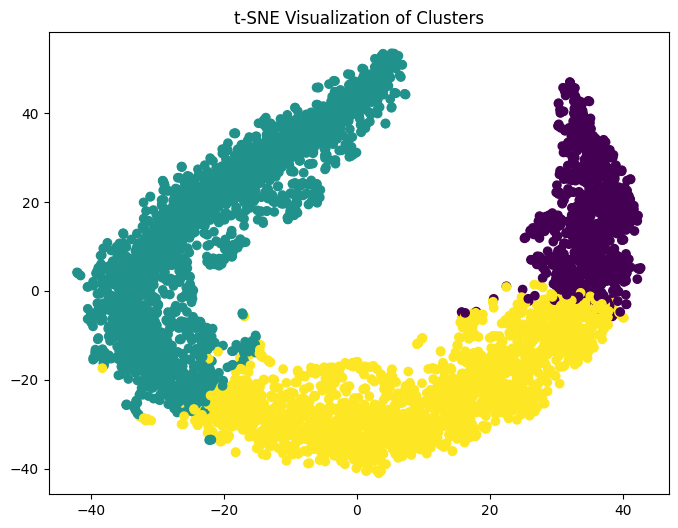

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()


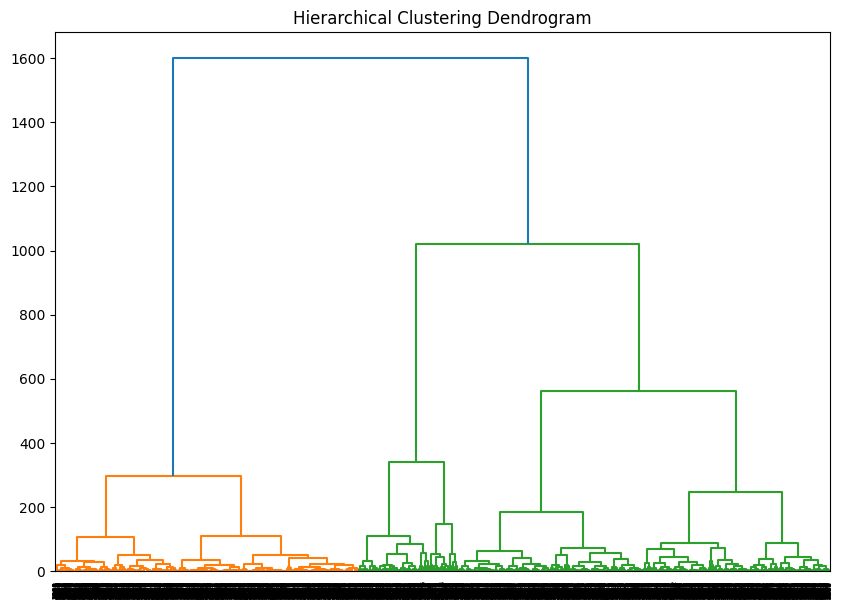

In [39]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(pca_result[:, :2], method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [40]:
!pip install networkx


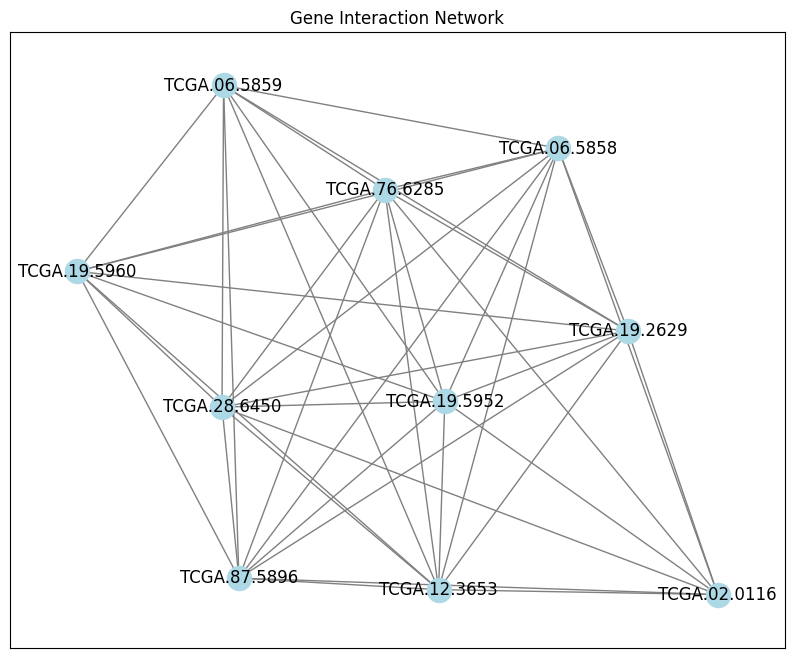

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

gene_corr = top_10_data.corr()  # Correlation matrix for top genes
G = nx.Graph()

# Add edges for high correlation (> 0.8)
for gene1 in gene_corr.columns:
    for gene2 in gene_corr.columns:
        if gene1 != gene2 and abs(gene_corr.loc[gene1, gene2]) > 0.8:
            G.add_edge(gene1, gene2, weight=gene_corr.loc[gene1, gene2])

# Visualize the network
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Gene Interaction Network')
plt.show()


#Advanced Clustering Techniques

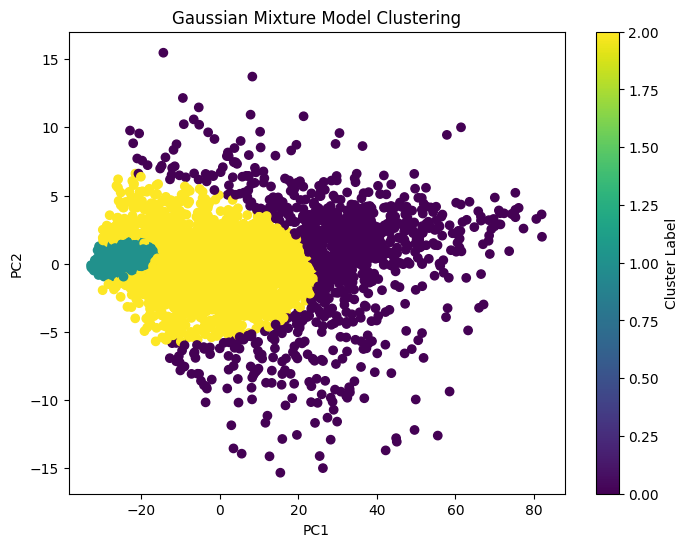

In [42]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(pca_result[:, :2])

# Visualize GMM clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()


#Hybrid Visualization: Combining PCA and t-SNE


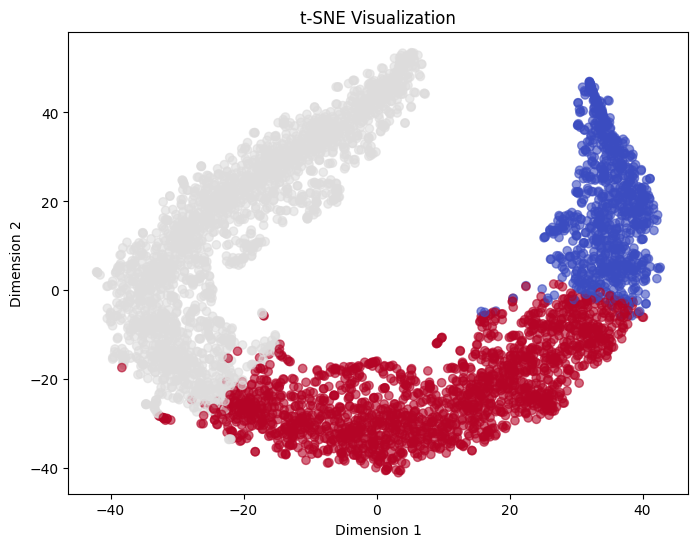

In [43]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne_result = TSNE(n_components=2, random_state=42).fit_transform(normalized_data)

# Combine PCA and t-SNE for visualization
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='coolwarm', alpha=0.6, label='t-SNE')
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
